### Import Dataset
- Reads the dataset `aggregated_full.csv` into a pandas DataFrame for analysis.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#CONSTS
READ_FOLDER_PATH = '../data/processed/'
WRITE_FOLDER_PATH = '../data/processed/'

aggregated_data = pd.read_csv(READ_FOLDER_PATH+'aggregated_full.csv')

print(aggregated_data.shape[0])
pd.set_option("display.max_colwidth", None) 
aggregated_data

9074


,id_odsp,date,season,league,country,home_team,away_team,odd_h,odd_d,odd_a,...,odds_ratio,shot_to_corner_ratio_pre_80,team_aggression_score_pre_80,home_urgency_to_attack,away_urgency_to_attack,home_momentum_to_attack,away_momentum_to_attack,attack_intensity,defensive_pressure,trailing_team_probability
0,UFot0hit/,2011-08-05,2012,D1,germany,Borussia Dortmund,Hamburg SV,1.56,4.41,7.42,...,0.210,1.692,1.273,0.000,0.067,0.000,0.067,0,-2,13.477
1,Aw5DflLH/,2011-08-06,2012,D1,germany,FC Augsburg,SC Freiburg,2.36,3.60,3.40,...,0.694,2.429,2.294,0.424,0.000,-0.424,-0.000,0,-3,42.373
2,CzPV312a/,2011-08-06,2012,F1,france,Paris Saint-Germain,Lorient,1.55,4.50,9.40,...,0.165,2.222,1.250,0.645,0.000,1.935,-0.000,3,0,64.516
3,GUOdmtII/,2011-08-06,2012,F1,france,Caen,Valenciennes,2.50,3.40,3.45,...,0.725,1.900,1.000,0.000,0.290,0.000,0.000,0,-2,28.986
4,M7PhlM2C/,2011-08-06,2012,F1,france,Brest,Evian Thonon Gaillard,2.29,3.25,3.85,...,0.595,2.000,0.767,0.627,0.373,2.508,0.000,0,-1,25.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9069,vJy048Er/,2017-01-22,2017,I1,italy,Empoli,Udinese,2.90,3.18,2.96,...,0.980,1.250,3.800,0.505,0.495,-0.505,0.000,0,0,33.784
9070,xAkY8l6R/,2017-01-22,2017,I1,italy,Genoa,Crotone,1.97,4.35,8.00,...,0.246,2.100,1.143,0.802,0.198,-0.802,-0.396,0,0,12.500
9071,xSU9scI9/,2017-01-22,2017,E0,england,Chelsea,Hull,1.19,8.50,20.00,...,0.060,1.000,1.533,0.000,0.050,0.000,0.050,1,-2,5.000
9072,xY7uZwOI/,2017-01-22,2017,F1,france,AS Monaco,Lorient,1.32,6.24,11.50,...,0.115,2.375,1.000,0.000,0.000,0.000,0.000,0,0,8.696


### Calculate Stats
Calculates:
- Num of 0s and 1s
- Probabilitiy of 0 and 1 
- Expected Value
- Variance
- Odds (Probability of success / Probability of failure)

In [18]:
# Calculate probabilities and statistics
target_counts=aggregated_data['target'].value_counts()
total_games =target_counts.sum() 
total_1s = target_counts.get(1, 0)
total_0s = target_counts.get(0, 0) 

#Calculate probabilities
prob_corner = target_counts.get(1, 0) / total_games  #Probability of getting a corner
prob_no_corner = target_counts.get(0, 0) / total_games  #Probability of not getting a corner

# Expected value
expected_value = 1*prob_corner + 0*prob_no_corner
#Variance
variance = prob_corner *prob_no_corner  
 
# Odds (Probability of success / Probability of failure)
odds = prob_corner / prob_no_corner if prob_no_corner >0 else float('inf') 
# Decimal betting odds (inverse of probability)
betting_odds = 1 /prob_corner if prob_corner >0 else float('inf') 
    
# Display the results
print("--- Stats ---")
print(f"Total Games: {total_games}") 
print(f"Total 1s: {total_1s}") 
print(f"Total 0s: {total_0s}\n") 
print(f"Probability of getting a corner (P(target=1)): {prob_corner:.4f}")
print(f"Probability of not getting a corner (P(target=0)): {prob_no_corner:.4f}")
print(f"Expected Value :{expected_value:.4f}") 
print(f"Variance: {variance:.4f}\n")
print(f"Odds (Corner vs No Corner): {odds:.4f}") 
print(f"Betting Odds (Decimal): {betting_odds:.2f}") 

--- Stats ---
Total Games: 9074
Total 1s: 6898
Total 0s: 2176

Probability of getting a corner (P(target=1)): 0.7602
Probability of not getting a corner (P(target=0)): 0.2398
Expected Value :0.7602
Variance: 0.1823

Odds (Corner vs No Corner): 3.1700
Betting Odds (Decimal): 1.32


### Plot Number of Games where Target was 1 vs 0

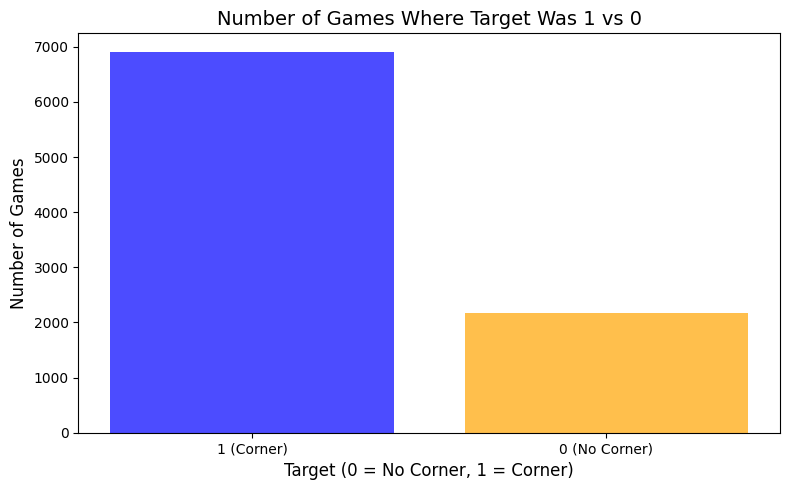

In [19]:
# Plot the number of games where the target was 1 vs 0
target_counts = aggregated_data['target'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index.astype(str), target_counts.values, color=['blue', 'orange'], alpha=0.7)
plt.title('Number of Games Where Target Was 1 vs 0', fontsize=14)
plt.xlabel('Target (0 = No Corner, 1 = Corner)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks([1, 0], labels=['0 (No Corner)', '1 (Corner)'])
plt.tight_layout()
plt.show()

### Plot corner at 80 minutes: home vs winning
- Filters games where the abs goal difference at 80 minutes is 1 and shows percente of trailing or winning team receiving a corner.

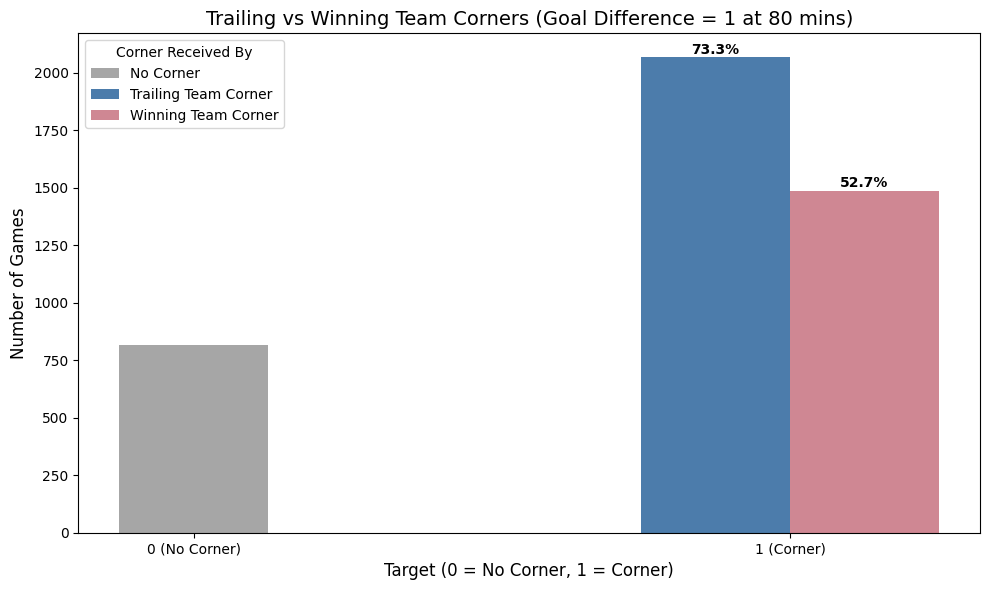

In [26]:
aggregated_data['abs_goal_diff_80'] = aggregated_data['goal_diff_80'].abs()

#Only look at games where goal diff = 1 at 80 mins
filtered_data = aggregated_data[aggregated_data['abs_goal_diff_80'] == 1] 
target_counts = filtered_data['target'].value_counts()
corner_games = filtered_data[filtered_data['target'] == 1].copy()

def flag_corners(row):
    home_corner, away_corner = row['home_corner_diff'] > 0, row['away_corner_diff'] >0
    return {
        'h': {'trailing_team_corner':away_corner,'winning_team_corner':home_corner}, 
        'a': {'trailing_team_corner':home_corner,'winning_team_corner': away_corner}
    }.get(row['game_state_80'], {'trailing_team_corner': False, 'winning_team_corner': False})

corner_games[['trailing_team_corner','winning_team_corner']] =corner_games.apply(flag_corners, axis=1, result_type='expand')

trailing_team_corner_count =corner_games['trailing_team_corner'].sum() 
winning_team_corner_count= corner_games['winning_team_corner'].sum() 
total_corner_games =len(corner_games)
   
plt.figure(figsize=(10, 6))
bar_width = 0.25
 
plt.bar(0, target_counts.get(0, 0), width=bar_width, color='grey', alpha=0.7, label='No Corner') 
trailing_bar = plt.bar(1-bar_width/2, trailing_team_corner_count,width=bar_width, color='#004488', alpha=0.7,label='Trailing Team Corner')
winning_bar = plt.bar(1+bar_width/2,winning_team_corner_count, width=bar_width, color='#BB5566',alpha=0.7,label='Winning Team Corner') 
   
for bar, count in zip([trailing_bar, winning_bar], [trailing_team_corner_count, winning_team_corner_count]):
    percentage = (count / total_corner_games) * 100
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height()+1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Trailing vs Winning Team Corners (Goal Difference = 1 at 80 mins)', fontsize=14)
plt.xlabel('Target (0 = No Corner, 1 = Corner)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks([0, 1], labels=['0 (No Corner)', '1 (Corner)'])

plt.legend(title='Corner Received By', fontsize=10)
plt.tight_layout()
plt.show()  

### Plot Target by league

- Plots total games played and ratio of Target being 1 vs 0 split across all 5 leagues

target     0     1
country           
england  257  1042
france   537  1539
germany  443  1165
italy    474  1602
spain    465  1550


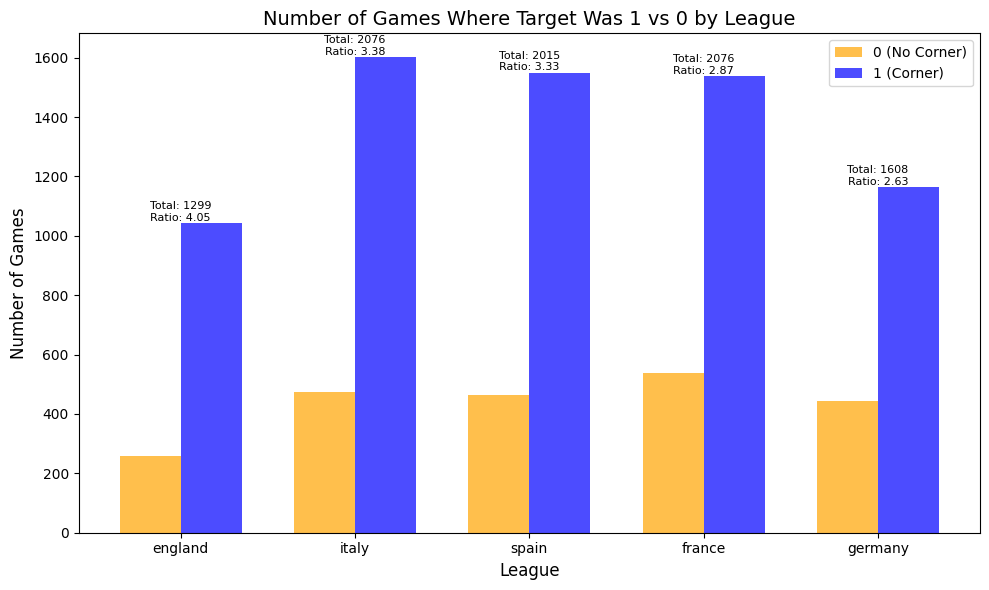

In [27]:
aggregated_data_copy = aggregated_data.copy()
plot_data = aggregated_data_copy.groupby(['country', 'target']).size().unstack(fill_value=0)
print(plot_data)

#Calculate total games and ratio
plot_data['total'] = plot_data[0] + plot_data[1]
plot_data['ratio'] = plot_data[1] /plot_data[0].replace(0,1)

#most 'succesful' league plotted first
plot_data = plot_data.sort_values(by='ratio', ascending=False)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6)) 
bar_width = 0.35 
index = range(len(plot_data)) 
   
bars_0 = ax.bar([i- bar_width/2 for i in index], plot_data[0],bar_width,label='0 (No Corner)', color='orange', alpha=0.7)
bars_1 = ax.bar([i+ bar_width/2 for i in index], plot_data[1],bar_width,label='1 (Corner)', color='blue', alpha=0.7) 

#annotate total game and ratio:
for i, league in enumerate(plot_data.index):
    total_games= plot_data.loc[league, 'total']
    ratio =plot_data.loc[league, 'ratio'] 
    max_height = max(plot_data.loc[league, 0], plot_data.loc[league, 1]) 
    ax.text(i, max_height + 1, f'Total: {total_games}\nRatio: {ratio:.2f}', 
            ha='center',va='bottom',fontsize=8) 

ax.set_title('Number of Games Where Target Was 1 vs 0 by League', fontsize=14)
ax.set_xlabel('League', fontsize=12)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(plot_data.index)
ax.legend() 
plt.tight_layout()
plt.show() 

### Plot Game State vs Target

- Investigates difference in game state distribution when target is 0 vs 1

game_state_80     a     d     h
target                         
0               566   588  1022
1              1939  1962  2997


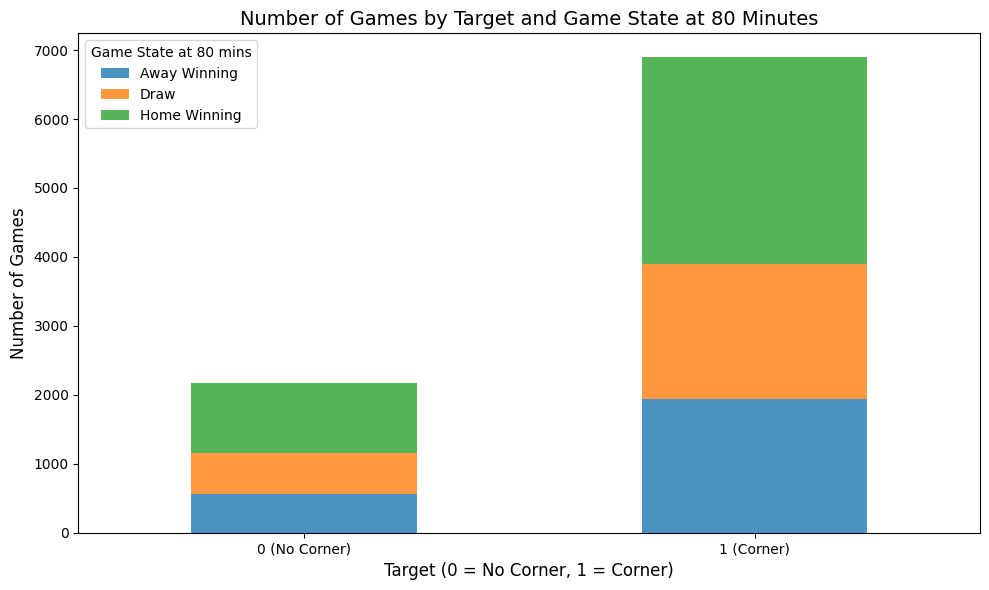

In [28]:
target_game_state_counts = aggregated_data_copy.groupby(['target', 'game_state_80']).size().unstack(fill_value=0)
print(target_game_state_counts)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6))
target_game_state_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.8)

ax.set_title('Number of Games by Target and Game State at 80 Minutes', fontsize=14)
ax.set_xlabel('Target (0 = No Corner, 1 = Corner)', fontsize=12)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0 (No Corner)', '1 (Corner)'],rotation=0)
ax.legend(title='Game State at 80 mins',labels=['Away Winning','Draw','Home Winning'])
plt.tight_layout()
plt.show()

### Sns Pair Plots

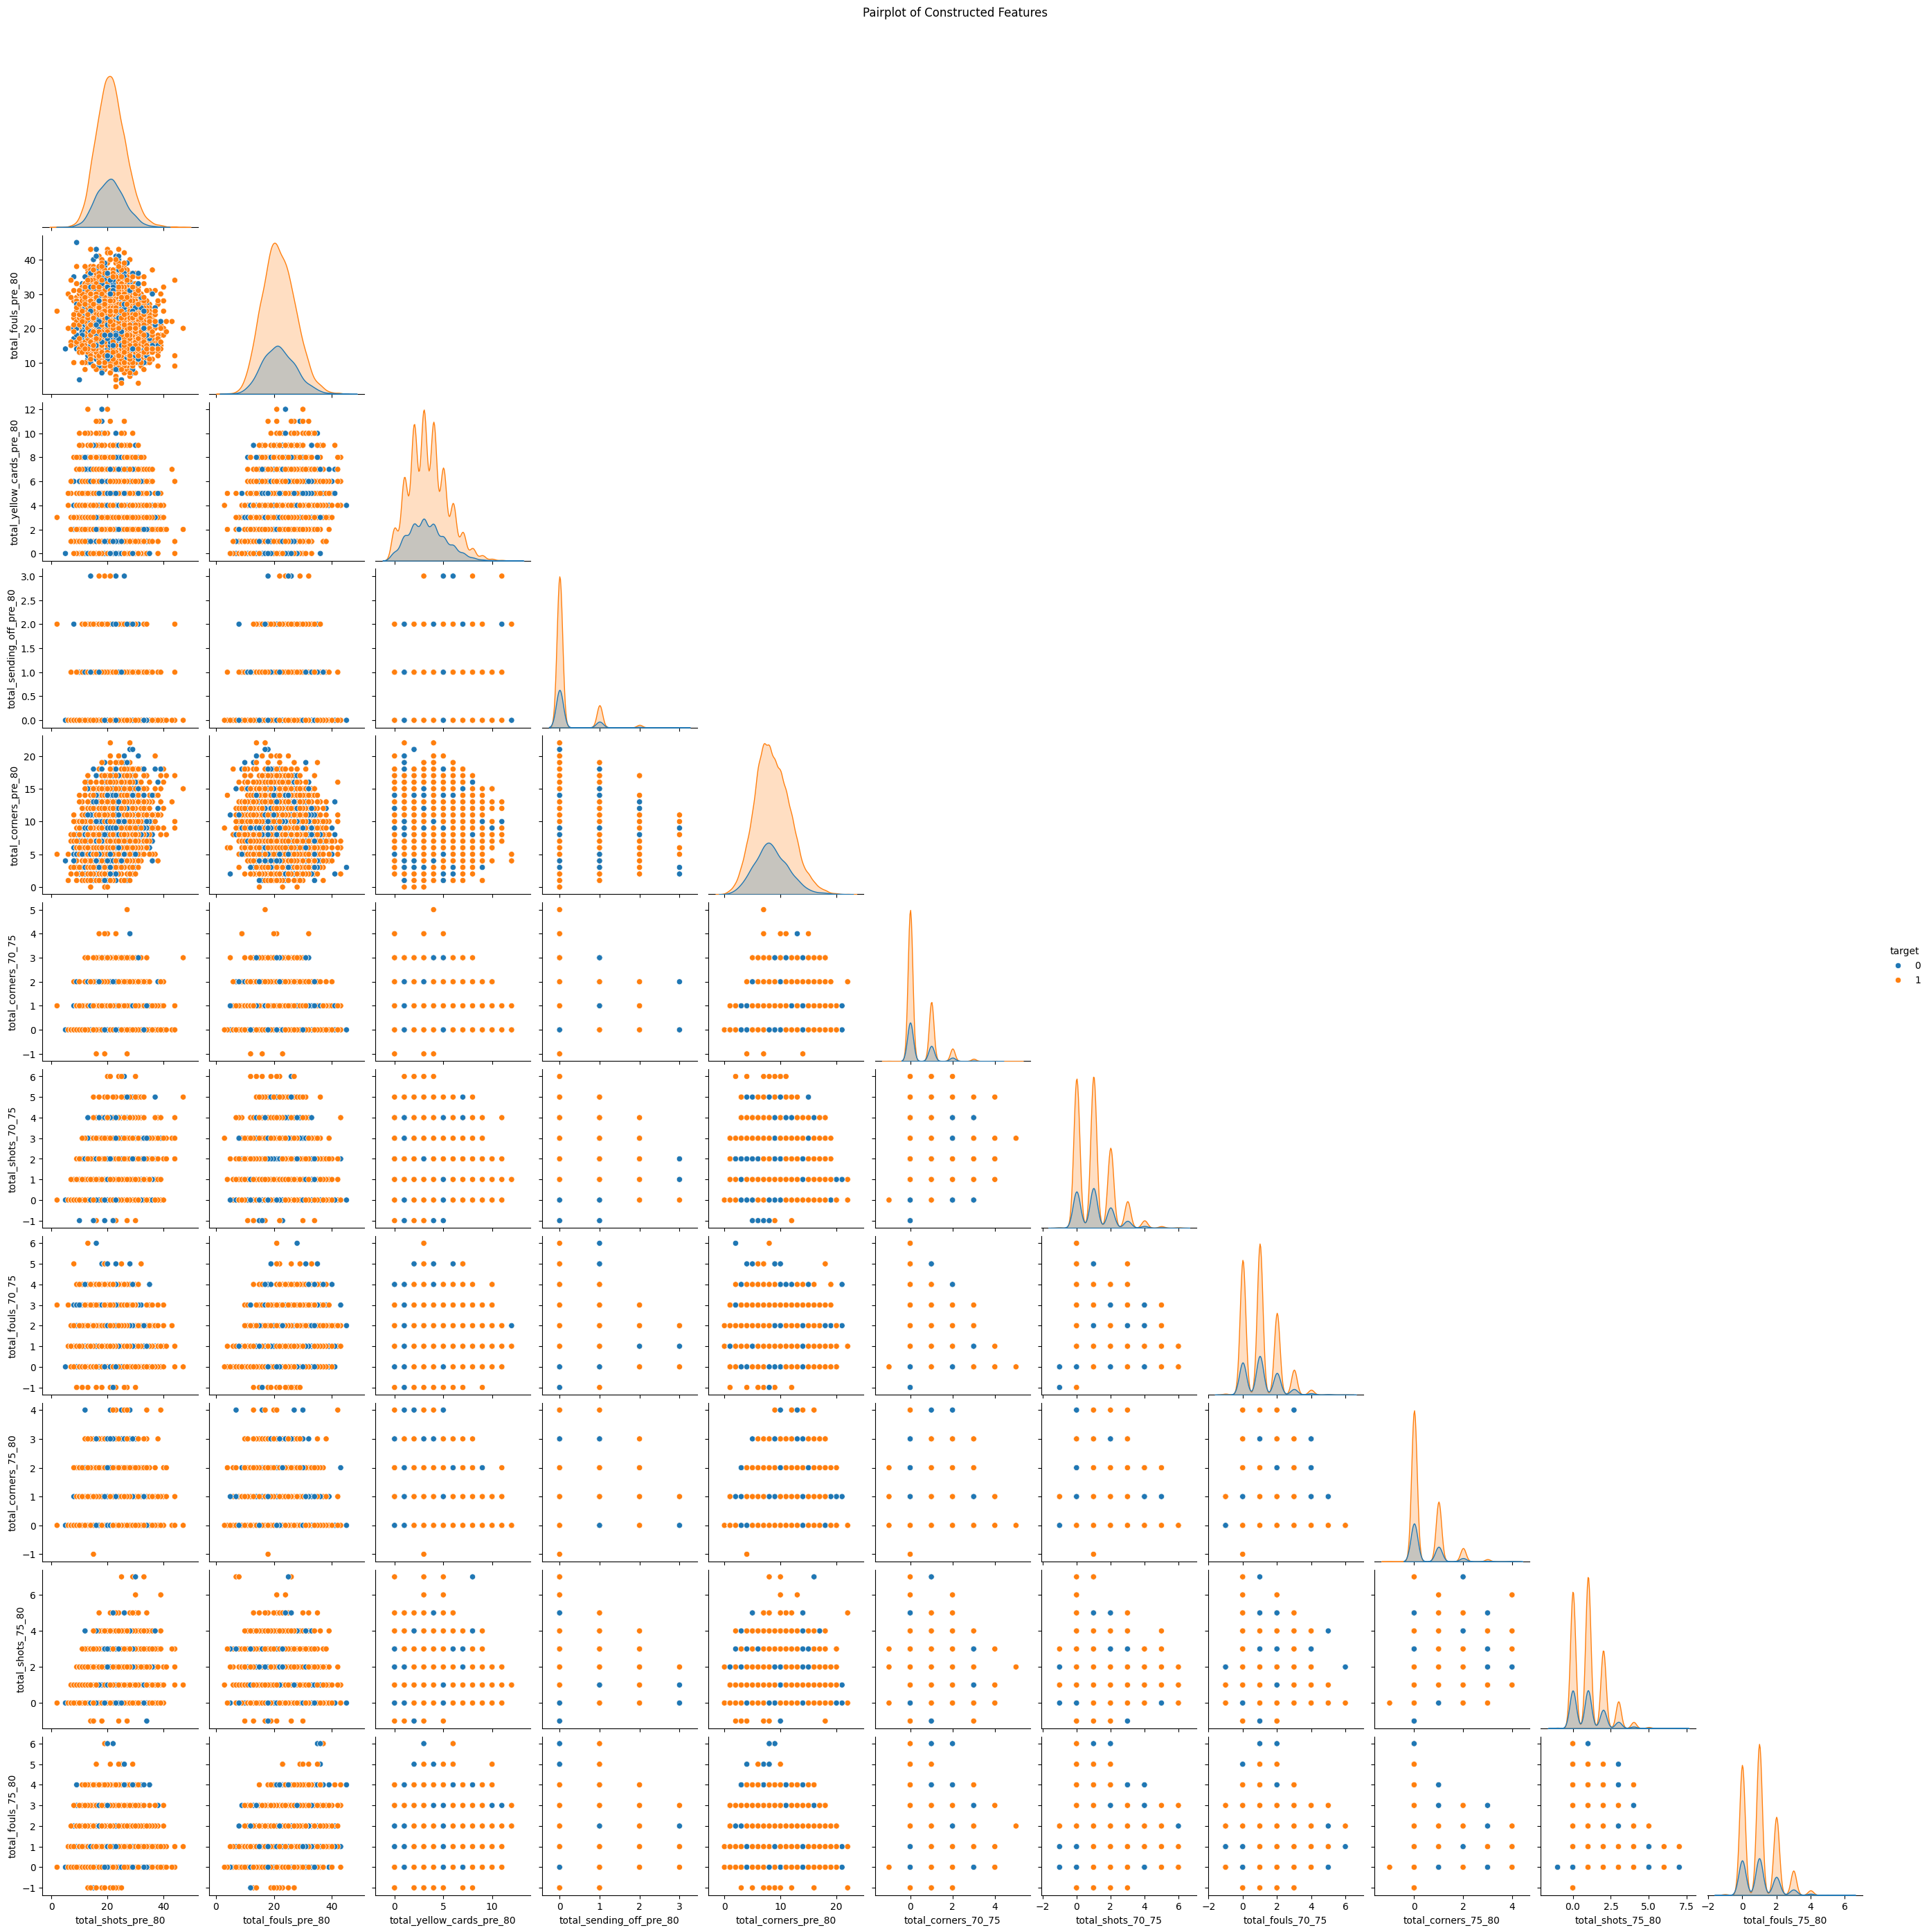

In [ ]:
data_to_analyse = aggregated_data.copy()

constructed_features = [
    "total_shots_pre_80", "total_fouls_pre_80", "total_yellow_cards_pre_80", 
    "total_sending_off_pre_80", "total_corners_pre_80", "total_corners_70_75",
    "total_shots_70_75", "total_fouls_70_75", "total_corners_75_80",
    "total_shots_75_80", "total_fouls_75_80"
]

#pair plot for selected features
data_to_plot = data_to_analyse[constructed_features + ["target"]]
sns.pairplot(data_to_plot, corner=True, hue="target", diag_kind="kde")
plt.suptitle("Pairplot of Constructed Features")
plt.show()

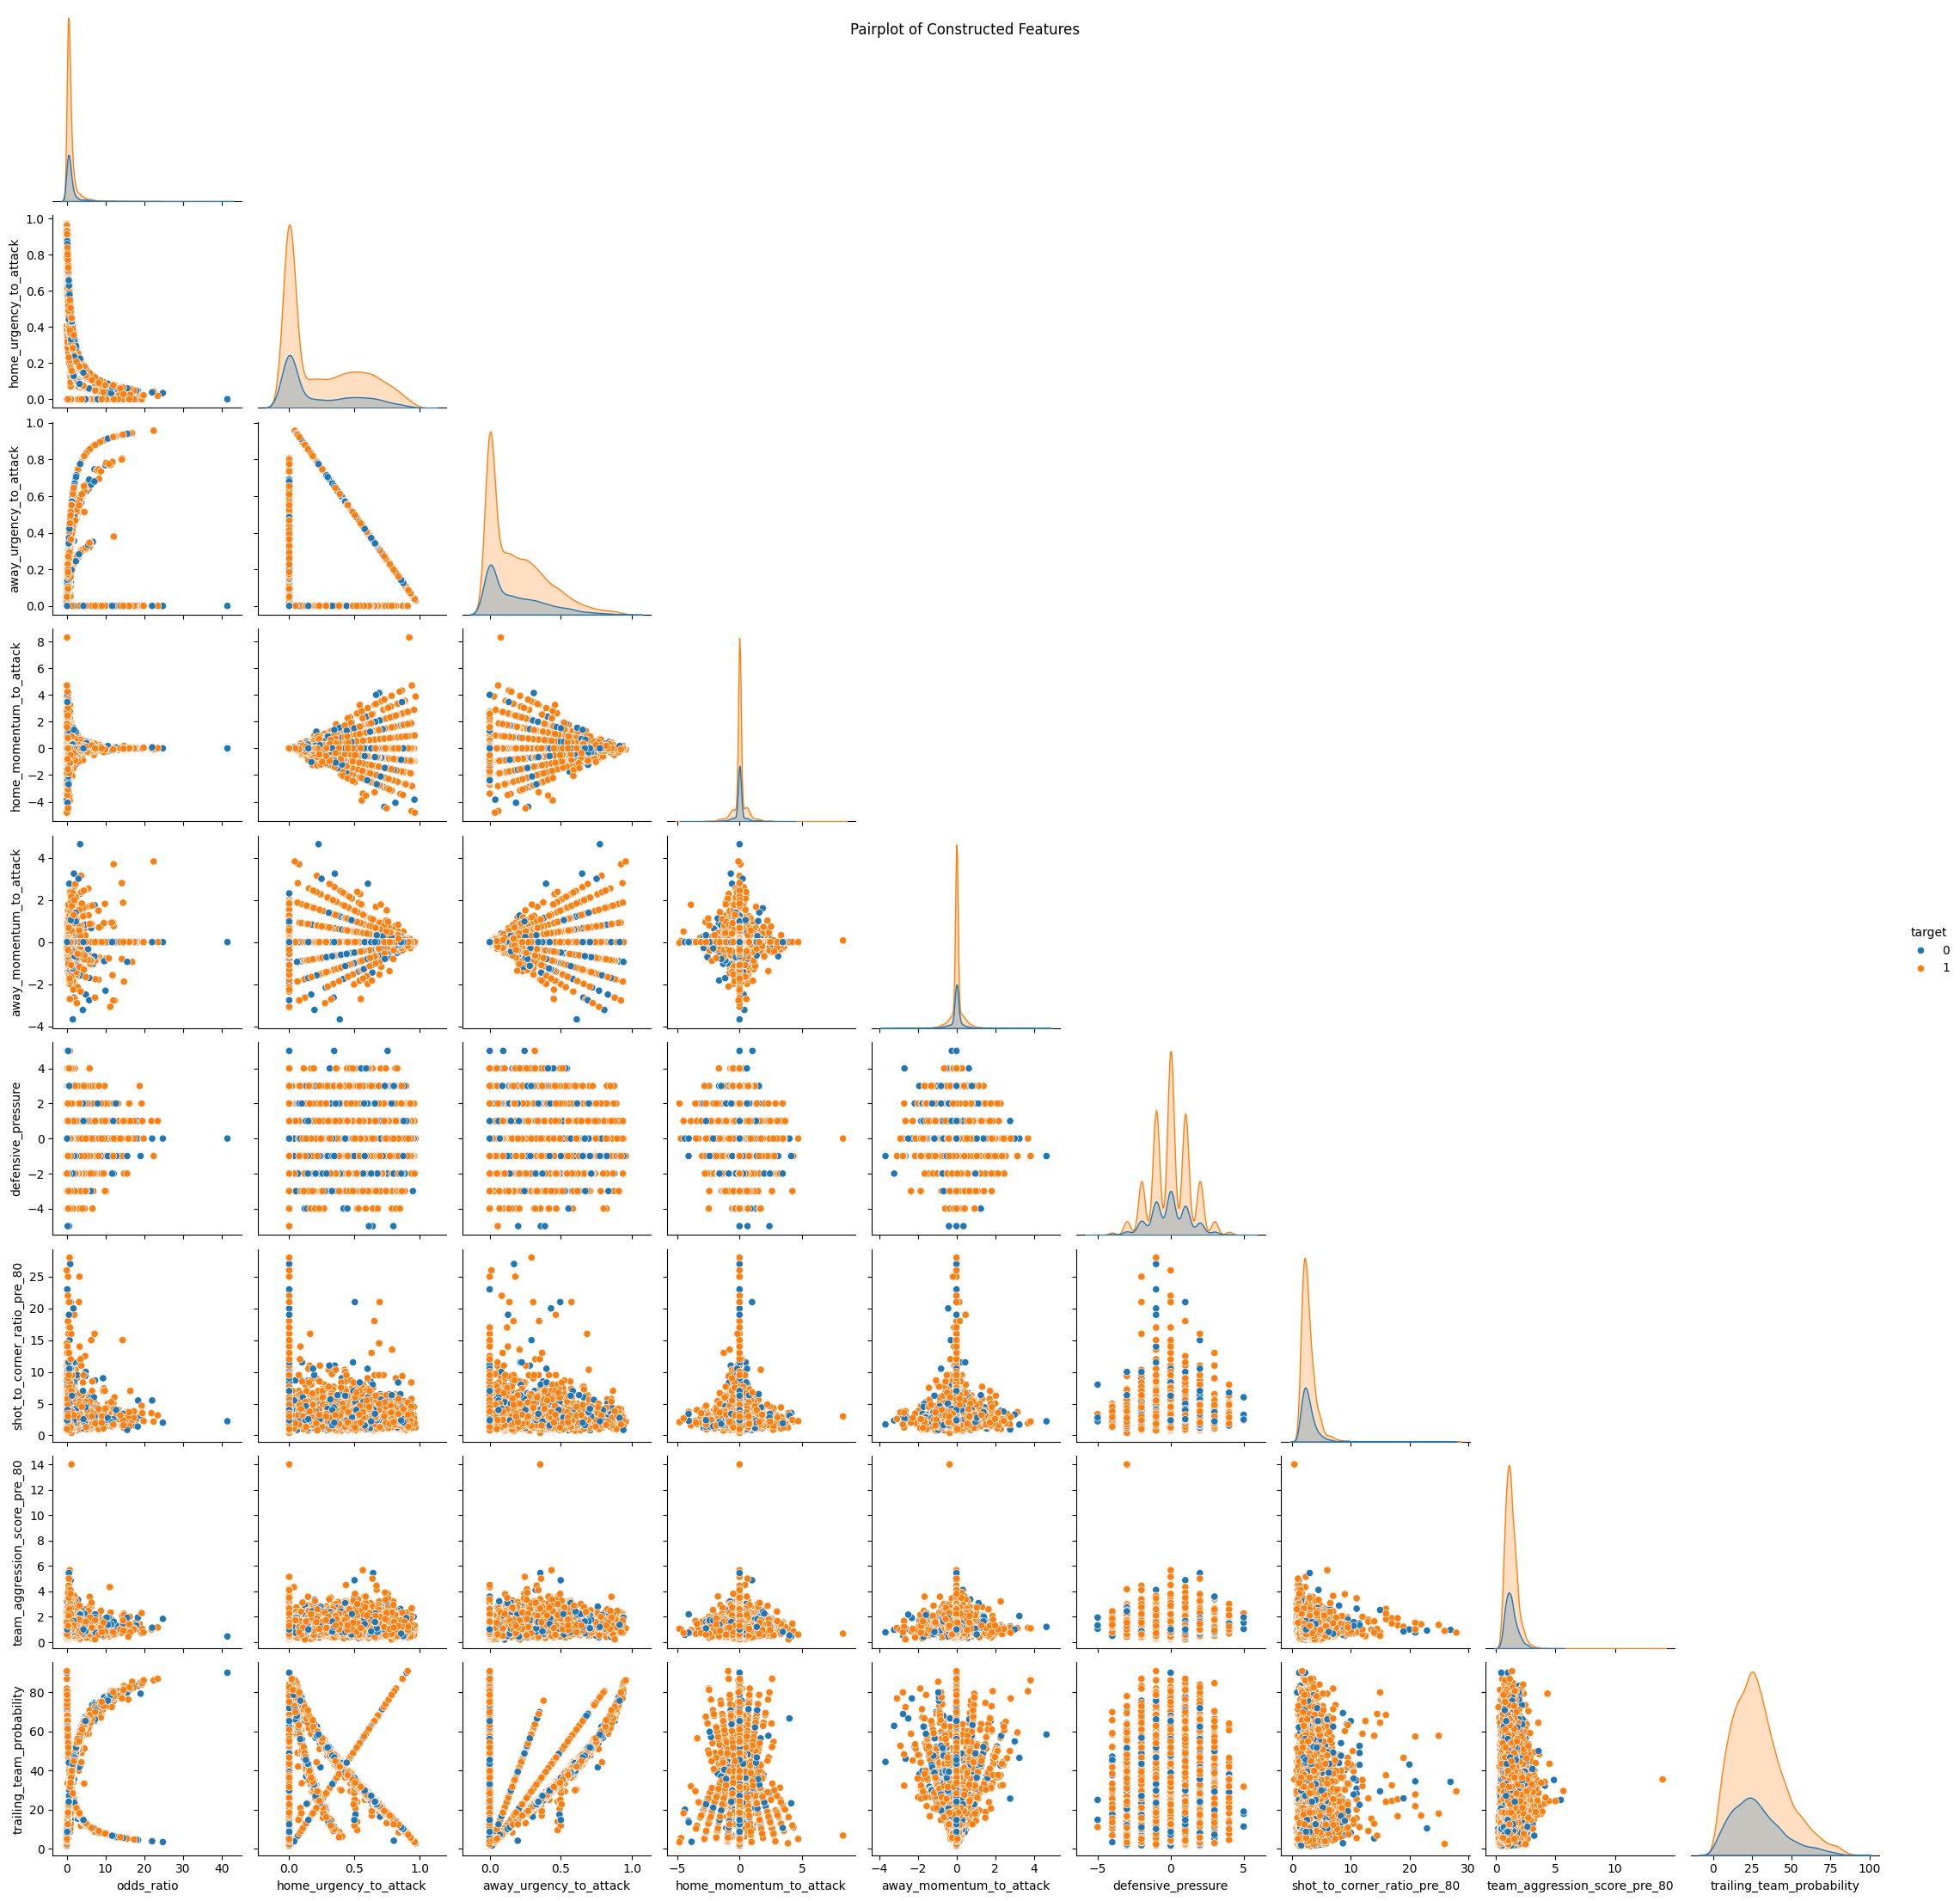

In [37]:
data_to_analyse = aggregated_data.copy()

constructed_features = [
    "odds_ratio",
    "home_urgency_to_attack", "away_urgency_to_attack",
    "home_momentum_to_attack", "away_momentum_to_attack",
    "defensive_pressure",
    "shot_to_corner_ratio_pre_80",
    "team_aggression_score_pre_80",
    "trailing_team_probability"
]

#pair plot for selected features
data_to_plot = data_to_analyse[constructed_features + ["target"]]
sns.pairplot(data_to_plot, corner=True, hue="target", diag_kind="kde")
plt.suptitle("Pairplot of Constructed Features")
plt.show()